# Chest X-Ray Images (Pneumonia)
kaggle - https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
current_dir = os.path.abspath(os.getcwd())

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom
from sklearn.metrics import accuracy_score

In [3]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [4]:
X_train = []
Y_train = []

labels = ['NORMAL', 'PNEUMONIA_BACTERIAL', 'PNEUMONIA_VIRAL']
image_size = 200

for i in labels:
    folderPath = os.path.join(current_dir + '\\Chest_X-Ray_Images_dataset' + '\\train', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [5]:
X_train, Y_train = shuffle(X_train, Y_train)
X_train.shape

(5840, 200, 200, 3)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = 0.2)

In [7]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

# Arquitetura da Rede Neural Convolucional

In [8]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(200, 200, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(256,(3,3),activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(3,activation = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint

callbacks = [ModelCheckpoint(filepath = 'model_CNN_Xray.keras', save_best_only = True)]

history = model.fit(X_train, y_train, epochs = 20, validation_split = 0.1, callbacks = callbacks)

Epoch 1/20
132/132 [==============================] - 247s 2s/step - loss: 2.9538 - accuracy: 0.6646 - val_loss: 0.8427 - val_accuracy: 0.7051
Epoch 2/20
132/132 [==============================] - 206s 2s/step - loss: 0.7320 - accuracy: 0.7231 - val_loss: 0.6573 - val_accuracy: 0.7650
Epoch 3/20
132/132 [==============================] - 204s 2s/step - loss: 0.5899 - accuracy: 0.7469 - val_loss: 0.5326 - val_accuracy: 0.8034
Epoch 4/20
132/132 [==============================] - 202s 2s/step - loss: 0.5385 - accuracy: 0.7764 - val_loss: 0.6410 - val_accuracy: 0.7714
Epoch 5/20
132/132 [==============================] - 201s 2s/step - loss: 0.5382 - accuracy: 0.7750 - val_loss: 0.5710 - val_accuracy: 0.7842
Epoch 6/20
132/132 [==============================] - 208s 2s/step - loss: 0.5256 - accuracy: 0.7740 - val_loss: 0.8976 - val_accuracy: 0.6880
Epoch 7/20
132/132 [==============================] - 209s 2s/step - loss: 0.5062 - accuracy: 0.7838 - val_loss: 0.5961 - val_accuracy: 0.7863

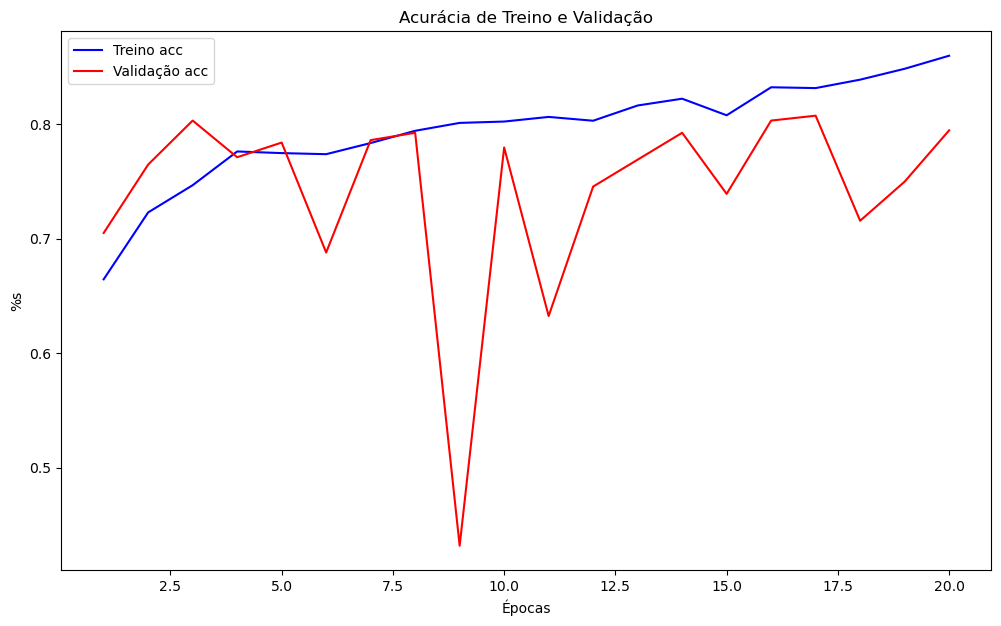

In [10]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

plt.figure(figsize = (12, 7))
plt.plot(epochs, accuracy, 'b', label = 'Treino acc')
plt.plot(epochs, val_accuracy, 'r', label = 'Validação acc')
plt.xlabel('Épocas')
plt.ylabel('%s')
plt.title('Acurácia de Treino e Validação')
plt.legend()
plt.show()

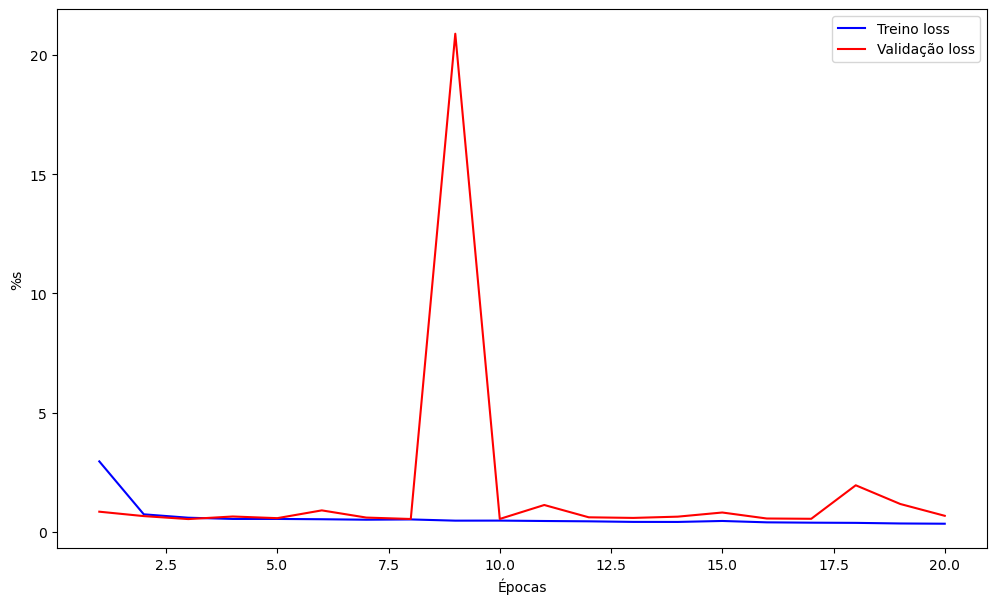

In [11]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize = (12, 7))
plt.plot(epochs, loss, 'b', label = 'Treino loss')
plt.plot(epochs, val_loss, 'r', label = 'Validação loss')
plt.xlabel('Épocas')
plt.ylabel('%s')
plt.legend()
plt.show()

In [12]:
from tensorflow import keras
model = keras.models.load_model('model_CNN_Xray.keras')

In [14]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')

37/37 [==============================] - 22s 574ms/step - loss: 0.6192 - accuracy: 0.7440
Test accuracy: 0.744
